# RF-классификатор

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_digits()

n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

clf = RandomForestClassifier()

In [2]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30),
              'max_leaf_nodes': Integer(2, 35),
              'n_estimators': Integer(100, 300)}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
evolved_estimator.fit(X_train,y_train)
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.800191	0.0916615  	0.920246   	0.671601   
1  	18    	0.87164 	0.066753   	0.920246   	0.701366   
2  	19    	0.918555	0.00899141 	0.933209   	0.90539    
3  	18    	0.932513	0.0119405  	0.944413   	0.918394   
4  	18    	0.943602	0.0100332  	0.953611   	0.922088   
5  	18    	0.948049	0.00604098 	0.957314   	0.938734   
6  	19    	0.951578	0.00449493 	0.957314   	0.940658   
7  	17    	0.953798	0.00129899 	0.957314   	0.951738   
8  	16    	0.955095	0.00160922 	0.957314   	0.953611   
9  	15    	0.955647	0.00193351 	0.957314   	0.951748   
10 	18    	0.956019	0.00166289 	0.957314   	0.953621   
11 	20    	0.954737	0.00262834 	0.957314   	0.951779   
12 	18    	0.955113	0.00270901 	0.957335   	0.951779   
13 	17    	0.955843	0.00308157 	0.957335   	0.948024   
14 	17    	0.956215	0.00334748 	0.957335   	0.946172   
15 	19    	0.954178	0.00469331 	0.957335   	0.94251    
16 	19    	0.953438	0.00520105 	0.957335   	0.94

0.9340222575516693

In [4]:
evolved_estimator.best_params_

{'min_weight_fraction_leaf': 0.010048098038149152,
 'bootstrap': False,
 'max_depth': 8,
 'max_leaf_nodes': 35,
 'n_estimators': 142}

c:\Python311\Lib\site-packages\sklearn_genetic\plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


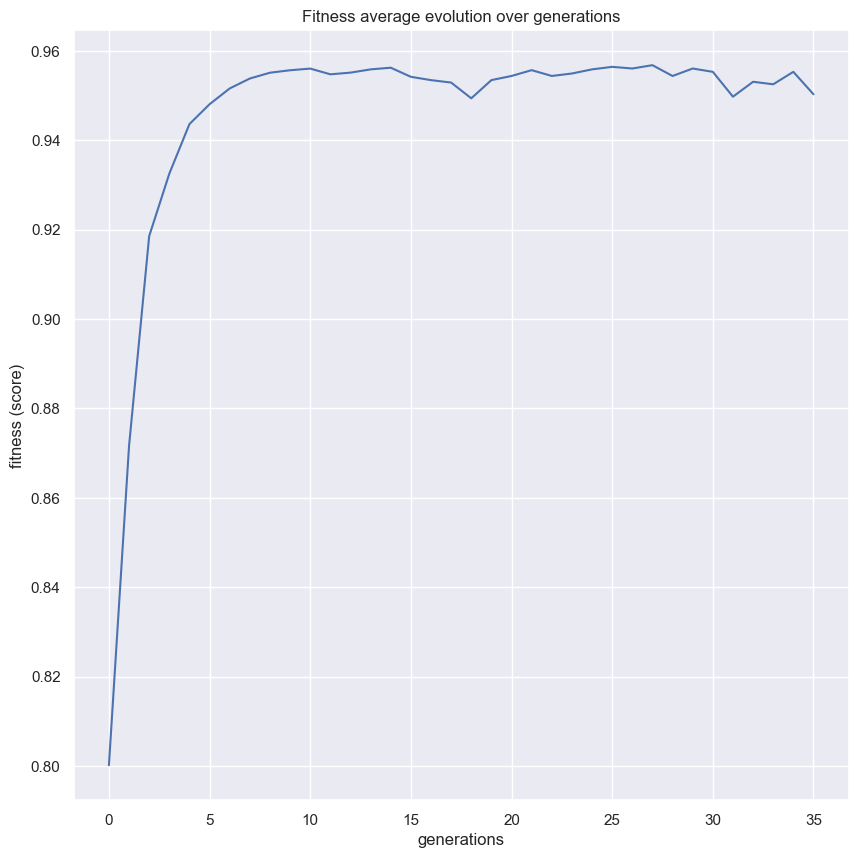

In [5]:
plot_fitness_evolution(evolved_estimator)
plt.show()

# SVM-классификатор

In [6]:
data = load_digits()

n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [7]:
import seaborn as sns
from sklearn import preprocessing
from random import randint
import scipy.stats as sts
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {'kernel': Categorical(['linear', 'rbf', 'poly', 'sigmoid']),
              'C': Integer(1,10)}
model=SVC()

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=model,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=parameters,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [8]:
evolved_estimator.fit(X_train,y_train)
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.965676	0.00898463 	0.975895   	0.944341   
1  	18    	0.96865 	0.00836781 	0.977736   	0.949866   
2  	18    	0.971617	0.00439131 	0.977695   	0.961039   
3  	17    	0.974774	0.00221079 	0.977695   	0.970319   
4  	18    	0.974954	0.00321349 	0.977695   	0.966636   
5  	18    	0.97329 	0.00406581 	0.977695   	0.964763   
6  	18    	0.976806	0.00289546 	0.979619   	0.970319   
7  	17    	0.974588	0.00361952 	0.979619   	0.968498   
8  	18    	0.974212	0.00305093 	0.979619   	0.970288   
9  	18    	0.975887	0.00276072 	0.979619   	0.972139   
10 	20    	0.975702	0.00315869 	0.979619   	0.970329   
11 	17    	0.977568	0.00281919 	0.979619   	0.97217    
12 	19    	0.974967	0.00486733 	0.979619   	0.964732   
13 	19    	0.976087	0.00450341 	0.979619   	0.964784   
14 	20    	0.9759  	0.00439629 	0.979619   	0.968446   
15 	18    	0.973491	0.00518228 	0.979619   	0.962932   
16 	19    	0.974792	0.00408294 	0.979619   	0.96

0.9809220985691574

In [9]:
evolved_estimator.best_params_

{'kernel': 'rbf', 'C': 8}

c:\Python311\Lib\site-packages\sklearn_genetic\plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


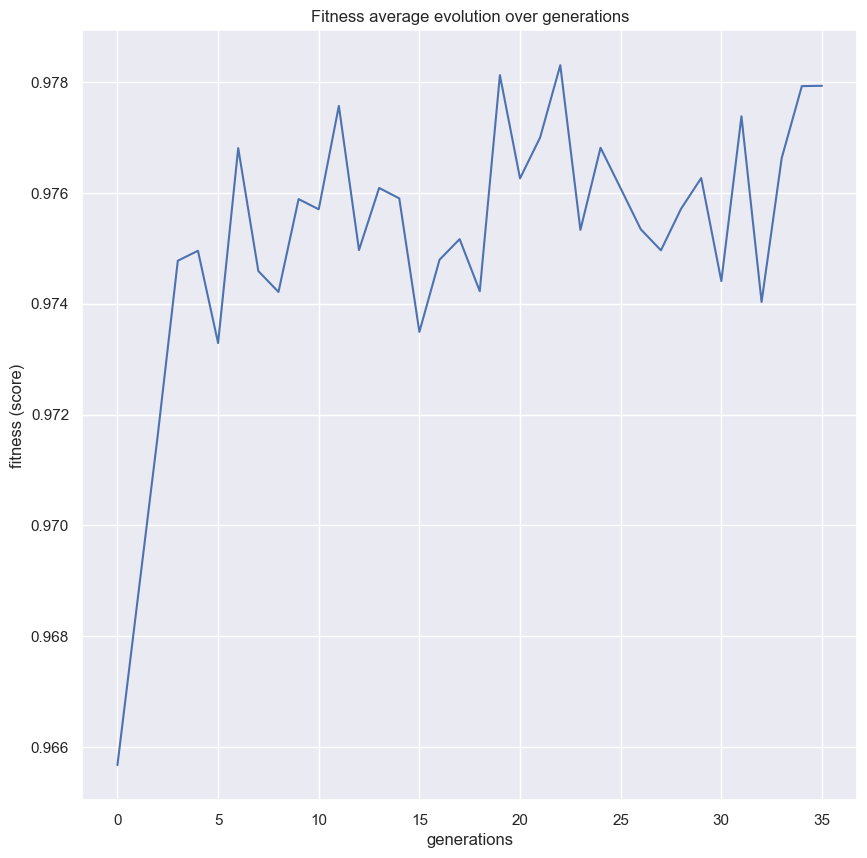

In [10]:
plot_fitness_evolution(evolved_estimator)
plt.show()

# K-means-классификатор

In [11]:
from sklearn.neighbors import RadiusNeighborsClassifier
data = load_digits()

n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [12]:
parameters = {'n_neighbors': Integer(3,10),
              'leaf_size': Integer(3,50)}
model=KNeighborsClassifier()

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=model,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=parameters,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [13]:
evolved_estimator.fit(X_train,y_train)
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.949163	0.00765763 	0.957345   	0.931388   
1  	16    	0.958628	0.00549527 	0.966594   	0.949917   
2  	16    	0.964011	0.00505408 	0.968467   	0.955473   
3  	18    	0.968273	0.00559158 	0.979588   	0.959187   
4  	17    	0.970694	0.00671792 	0.979588   	0.959239   
5  	16    	0.971992	0.00576911 	0.979588   	0.964753   
6  	16    	0.973654	0.00467693 	0.979588   	0.968467   
7  	16    	0.971973	0.00384601 	0.979588   	0.968467   
8  	16    	0.973276	0.00416801 	0.979588   	0.970298   
9  	17    	0.971425	0.0045588  	0.979588   	0.964732   
10 	20    	0.968077	0.00460211 	0.97217    	0.957335   
11 	16    	0.969376	0.00364046 	0.97217    	0.959176   
12 	18    	0.968828	0.00368661 	0.97217    	0.961039   
13 	19    	0.971418	0.00189939 	0.975854   	0.968405   
14 	19    	0.97088 	0.00248392 	0.975854   	0.966636   
15 	18    	0.969391	0.00512801 	0.975854   	0.957304   
16 	17    	0.971615	0.00309814 	0.975854   	0.96

0.9761526232114467

In [14]:
evolved_estimator.best_params_

{'n_neighbors': 3, 'leaf_size': 43}

c:\Python311\Lib\site-packages\sklearn_genetic\plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


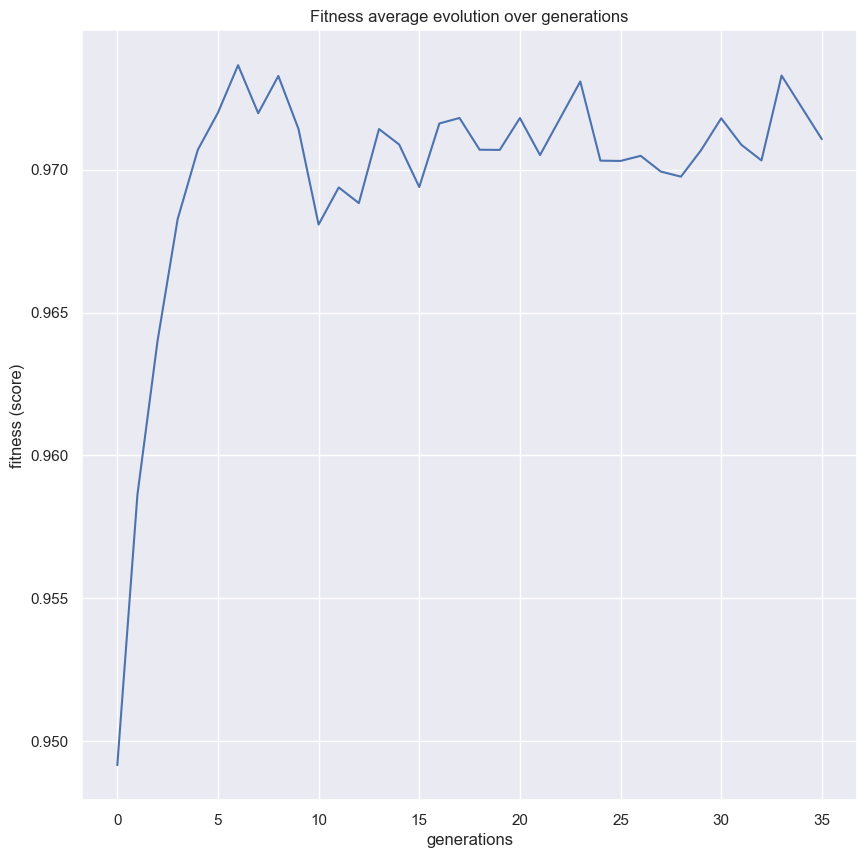

In [15]:
plot_fitness_evolution(evolved_estimator)
plt.show()